In [1]:
import pandas
import numpy as np
df = pandas.read_csv("housing.csv")


In [2]:
cleaned_df=df.dropna()

In [3]:
corr_df=  cleaned_df.drop(columns=["latitude", "longitude", "ocean_proximity"] )
temp = corr_df.corrwith(cleaned_df["median_house_value"])
print(temp)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64


In [4]:
cleaned_df=pandas.get_dummies(cleaned_df,columns=["ocean_proximity"])
X = cleaned_df.drop(columns=["median_house_value"])
Y = cleaned_df[["median_house_value"]]


array([[<AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

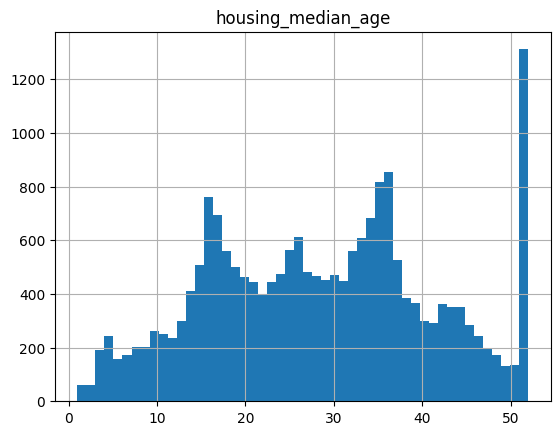

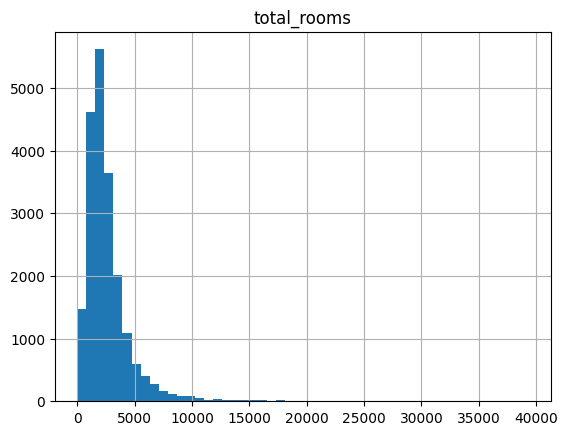

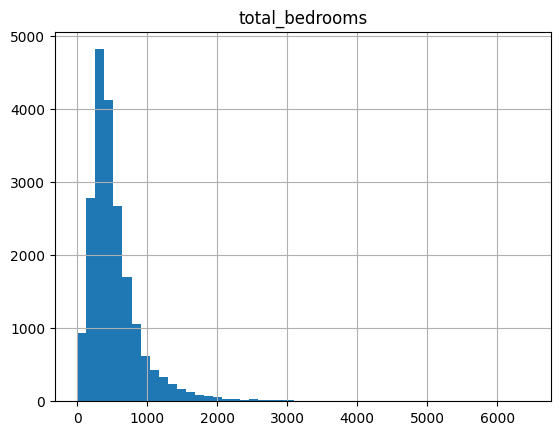

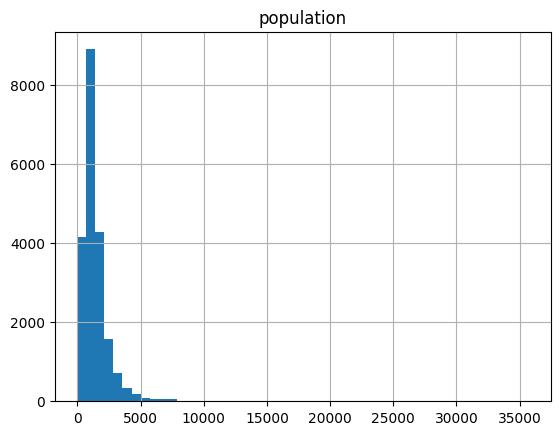

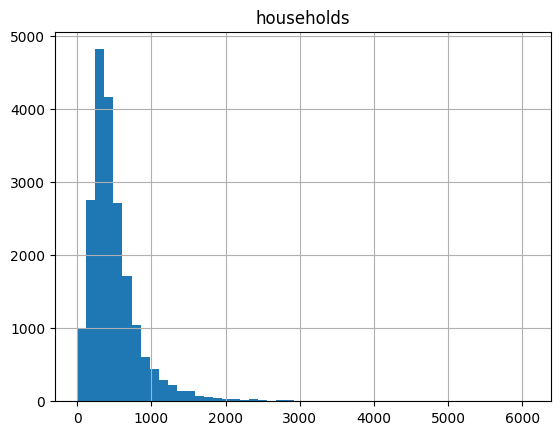

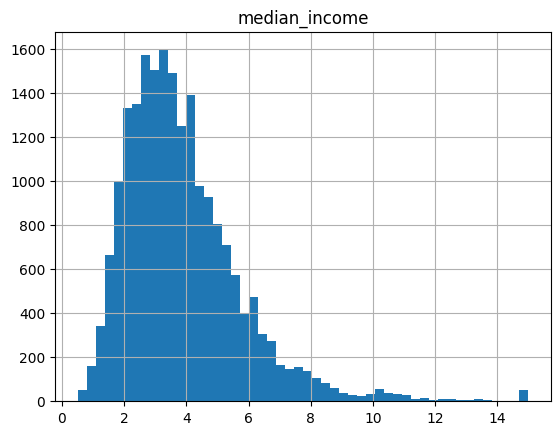

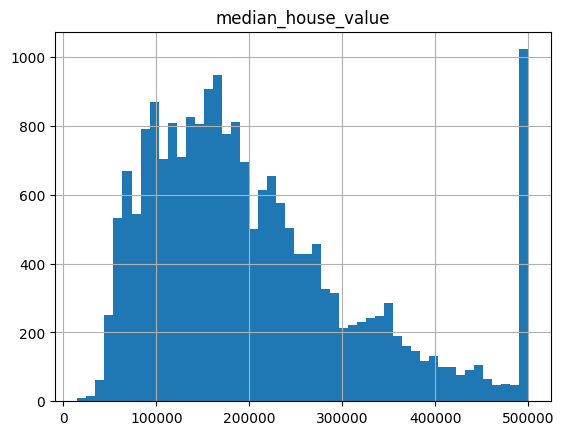

In [5]:
import matplotlib
cleaned_df.hist(bins=50,column="housing_median_age")
cleaned_df.hist(bins=50,column="total_rooms")
cleaned_df.hist(bins=50,column="total_bedrooms")
cleaned_df.hist(bins=50,column="population")
cleaned_df.hist(bins=50,column="households")
cleaned_df.hist(bins=50,column="median_income")
cleaned_df.hist(bins=50,column="median_house_value")

In [6]:
cleaned_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14303, 13) (6130, 13) (14303, 1) (6130, 1)


In [8]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
target_value_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
y_train = target_value_scaler.fit_transform(y_train)
X_test = feature_scaler.transform(X_test)
y_test = target_value_scaler.transform(y_test)

array([[<AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

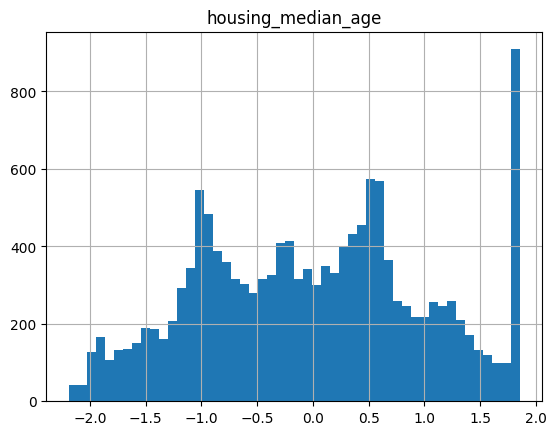

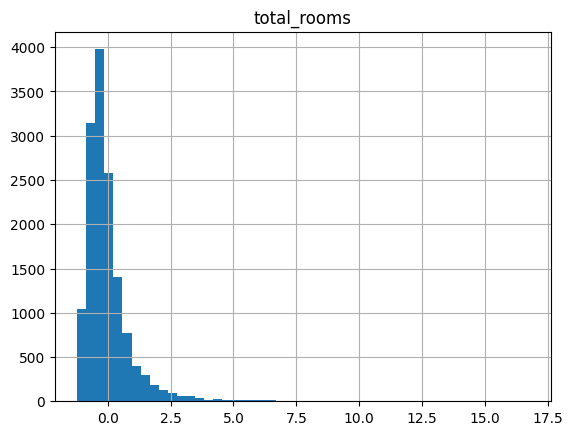

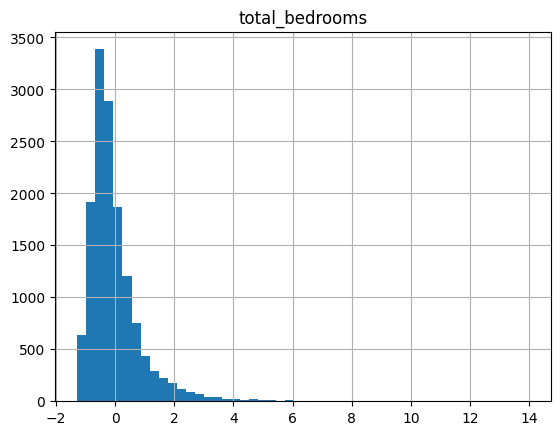

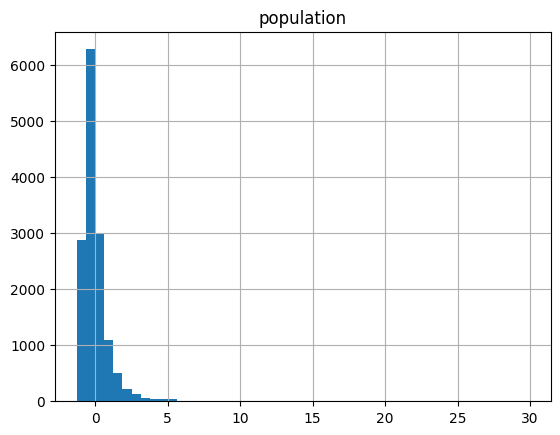

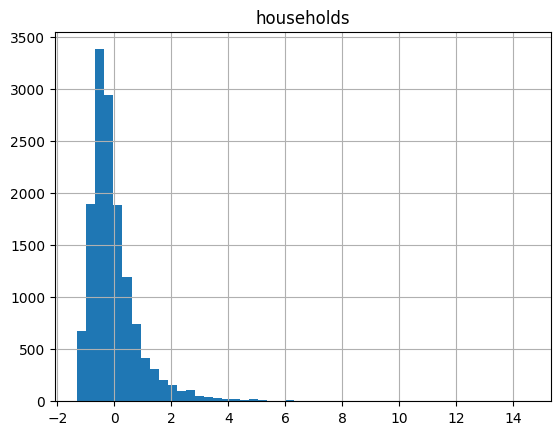

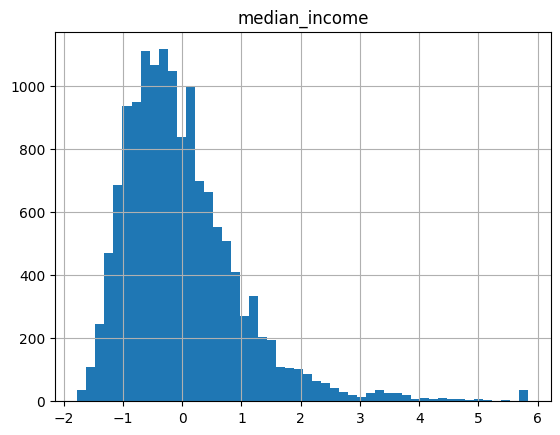

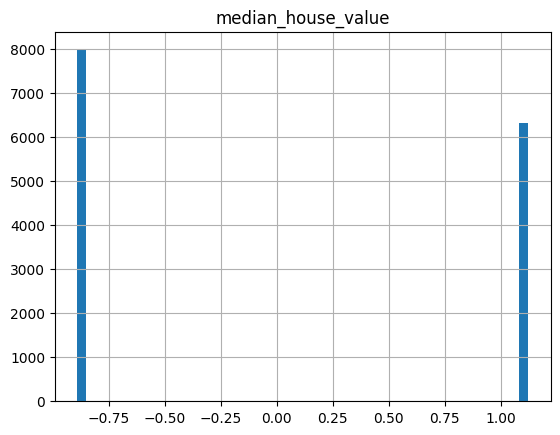

In [9]:

df_norm = pandas.DataFrame(np.concatenate((X_train, y_train), axis=1), columns = list(cleaned_df.columns))
df_norm.hist(bins=50,column="housing_median_age")
df_norm.hist(bins=50,column="total_rooms")
df_norm.hist(bins=50,column="total_bedrooms")
df_norm.hist(bins=50,column="population")
df_norm.hist(bins=50,column="households")
df_norm.hist(bins=50,column="median_income")
df_norm.hist(bins=50,column="median_house_value")

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_preds= reg.predict(X_test)
y_preds = target_value_scaler.inverse_transform(y_preds)
y_test = target_value_scaler.inverse_transform(y_test)


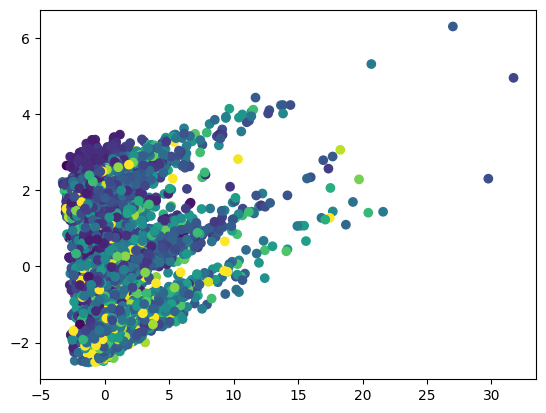

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt=pca.fit_transform(X_train)
import matplotlib.pyplot as plt
plot = plt.scatter(Xt[:,0], Xt[:,1],c=y_train)
plt.show()

In [12]:

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.30117887 0.19790457]
[236.64508833 191.82851185]


(6130, 1) (6130, 1) (20433, 1)


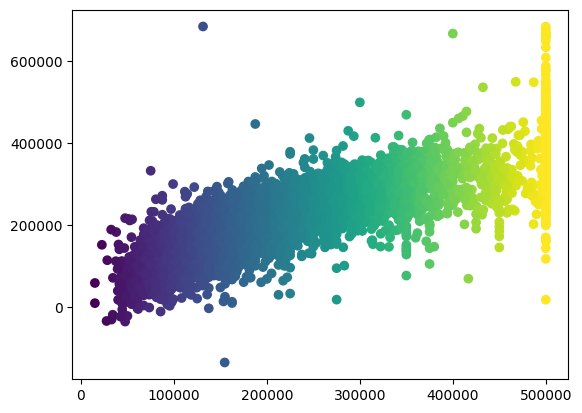

In [13]:
print(y_preds.shape,y_test.shape,Y.shape)
plot = plt.scatter(y_test, y_preds,c=y_test)
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_preds))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_preds,squared=False))

from sklearn.metrics import r2_score
print(r2_score(y_test, y_preds))


0.28539029596271637
68563.66583690568
0.6494603278601598
